In [24]:
%conda install matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/studio-lab-user/.conda/envs/torch

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h7f98852_6          18 KB  conda-forge
    brotli-bin-1.0.9           |       h7f98852_6          19 KB  conda-forge
    certifi-2021.10.8          |   py39hf3d152e_1         145 KB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    fonttools-4.28.5           |   py39h3811e60_0         1.6 MB  conda-forge
    kiwisolver-1.3.2           |   py39h1a9c180_1          80 KB  conda-forge
    libbrotlicommon-1.0.9      |       h7f98852_6          65

In [2]:
%conda install -c conda-forge opencv

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/studio-lab-user/.conda/envs/torch

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    alsa-lib-1.2.3             |       h516909a_0         560 KB  conda-forge
    aom-3.2.0                  |       h9c3ff4c_2         5.4 MB  conda-forge
    c-ares-1.18.1              |       h7f98852_0         113 KB  conda-forge
    cairo-1.16.0               |    h6cf1ce9_1008         1.5 MB  conda-forge
    dbus-1.13.6             

In [3]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5943, done.
remote: Total 5943 (delta 0), reused 0 (delta 0), pack-reused 5943
Receiving objects: 100% (5943/5943), 6.37 MiB | 36.02 MiB/s, done.
Resolving deltas: 100% (3927/3927), done.


In [4]:
import os

In [7]:
os.chdir("./darknet/")

In [8]:
!ls

LICENSE       LICENSE.gpl   LICENSE.v1	cfg	  include  src
LICENSE.fuck  LICENSE.meta  Makefile	data	  python
LICENSE.gen   LICENSE.mit   README.md	examples  scripts


In [11]:
#!sed -i 's/GPU=1/GPU=0/g' Makefile

In [12]:
!make

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
In file included from /usr/include/string.h:495,
                 from ./src/utils.c:3:
In function ‘strncpy’,
    inlined from ‘copy_string’ at ./src/utils.c:426:5:
/usr/include/x86_64-linux-gnu/bits/string_fortified.h:106:10: warning: ‘__builtin_strncpy’ specified bound depends on the length of the source argument [-Wstringop-overflow=]
  106 |   return __builtin___strncpy_chk (__dest, __src, __len, __bos (__dest));
      |          ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
./src/utils.c: In function ‘copy_string’:
./src/utils.c:426:22: note: length computed here
  426 |     strncpy(copy, s, strlen(s)+1);
      |                      ^~~~~~~~~
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wf

In [13]:
!wget http://pjreddie.com/media/files/yolov1/yolov1.weights

--2022-01-16 01:26:28--  http://pjreddie.com/media/files/yolov1/yolov1.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/yolov1/yolov1.weights [following]
--2022-01-16 01:26:28--  https://pjreddie.com/media/files/yolov1/yolov1.weights
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789312988 (753M) [application/octet-stream]
Saving to: 'yolov1.weights'

yolov1.weights      100%[===================>] 752.75M  47.7MB/s    in 17s     

2022-01-16 01:26:45 (44.5 MB/s) - 'yolov1.weights' saved [789312988/789312988]



In [43]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-01-16 02:27:19--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: 'yolov3.weights'

yolov3.weights      100%[===================>] 236.52M  46.8MB/s    in 5.7s    

2022-01-16 02:27:25 (41.8 MB/s) - 'yolov3.weights' saved [248007048/248007048]



In [65]:
output='/home/studio-lab-user/sagemaker-studiolab-notebooks/yolo/darknet/predictions.jpg'

In [78]:
!./darknet detect /home/studio-lab-user/sagemaker-studiolab-notebooks/yolo/darknet/cfg/yolov3.cfg /home/studio-lab-user/sagemaker-studiolab-notebooks/yolo/darknet/yolov3.weights /home/studio-lab-user/sagemaker-studiolab-notebooks/yolo/ducks.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

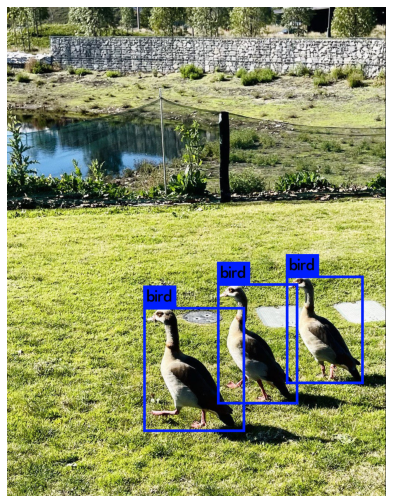

In [79]:
import cv2
import matplotlib.pyplot as plt
import os.path
fig,ax = plt.subplots(figsize=(18,9))
ax.axis('off')
if os.path.exists(output):
  img = cv2.imread(output)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img)